<a href="https://colab.research.google.com/github/670510772/229351-Statlearningfordatasci1/blob/main/670510772_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [ ]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [ ]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-17 02:29:18--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-17 02:29:18 (7.48 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-17 02:29:19--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  

In [ ]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5] #animal first 5 row

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [ ]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5] #find animal type

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [ ]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data

# 2. หา covariance matrix

# 3. Decompose the covariance matrix UDU^T

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U

# Result: a (50,2) matrix


In [ ]:
import numpy as np

Σ = np.random.rand(50, 85)

np.mean(Σ, axis=0)
#normalize the columns
Σ = Σ - np.mean(Σ, axis=0)
#covariance matrix Σ
A = np.cov(Σ, rowvar=False)
#Decompose the covariance matrix UDU^T
dpA = np.linalg.eigh(A)
D = dpA[0]
U = dpA[1]
diagD = np.diag(D)
#print(U @ diagD @ U.T,' <- UDU^T')
#ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา
U_23 = U[:,-2:]
#ทำ projection ทิศทางของ eigenvector ใน U
M2 = Σ @ U_23
print(M2.shape)
print(M2)

(50, 2)
[[-0.49298122  0.09120131]
 [ 0.48899878  0.24327981]
 [-0.10202232 -0.24866696]
 [-0.16451553  0.21050348]
 [ 0.20032917 -0.58627688]
 [ 0.33504106  0.59052492]
 [ 0.51788308  0.42411879]
 [ 0.82172824  0.34049345]
 [ 0.40654507 -1.04762139]
 [ 0.40823273 -0.52351582]
 [ 0.35961732 -0.00852474]
 [ 0.50616943  0.05365766]
 [ 0.60327338  0.66443528]
 [ 0.05209662 -0.53639985]
 [ 0.02059945 -0.49418661]
 [-0.35497802  0.33088448]
 [ 1.187038    0.1691687 ]
 [-0.57193064 -0.70166259]
 [-0.46132904  0.86813115]
 [ 0.1219851   0.84827409]
 [ 0.18208614  0.35080685]
 [-1.0326747   0.03072802]
 [ 1.359353   -0.06824681]
 [ 1.21471037 -0.11174575]
 [ 0.05262981 -0.0730799 ]
 [-1.48239882 -1.04667548]
 [-0.74008091  0.05776334]
 [-0.57110319  0.61503297]
 [-0.6900258   0.00543973]
 [ 0.2804889  -0.62394173]
 [-1.36672543  0.72620922]
 [-0.49646667 -1.63391299]
 [ 1.06098424 -0.48038123]
 [ 0.77069535 -0.24369562]
 [-0.33792903 -0.49507411]
 [-0.85668975  0.71081019]
 [-0.66759018 -0.096

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
Σ = np.random.rand(50, 85)

pca = PCA(n_components=2)
B2 = pca.fit_transform(Σ)
print(B2.shape)
print(B2)

(50, 2)
[[ 1.03699899  0.37497821]
 [-0.72953488 -0.05029874]
 [-0.50763059  0.2259694 ]
 [-0.98113637  0.92294147]
 [ 0.12976189  0.40222157]
 [-0.76710246  0.60301006]
 [ 0.23887932  0.28082302]
 [ 0.24241922  0.65082281]
 [ 0.30484432 -0.03988295]
 [-0.8688116  -0.15200539]
 [-0.35947567 -0.41139177]
 [-0.54444922 -0.51956333]
 [ 0.68485099  0.34283262]
 [-0.79880975  0.90927405]
 [ 0.1093721   0.08965299]
 [ 0.28663562  0.06081251]
 [ 1.57264113  0.55057734]
 [-0.47140728  1.0404034 ]
 [-0.30949659  0.36685342]
 [ 0.33210891 -0.70014152]
 [-0.72380831 -0.67312802]
 [ 0.00988708 -0.31537072]
 [ 0.41347097 -1.20772366]
 [ 0.50656509 -0.34769156]
 [ 1.63526465 -0.41491322]
 [ 1.16758378 -0.49232956]
 [ 0.49612216  1.71486383]
 [ 0.49213556  0.47899271]
 [ 0.59198111 -0.13341256]
 [-0.84808829 -1.24017796]
 [-0.55144095 -0.72904937]
 [ 0.24530169 -1.14909594]
 [ 0.45933518  0.16281689]
 [ 0.47570562 -0.62057082]
 [-0.26192522  0.86544106]
 [-0.28609477  0.06893806]
 [ 0.02289665  0.012

In [ ]:
#TODO (optional): enter code here

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

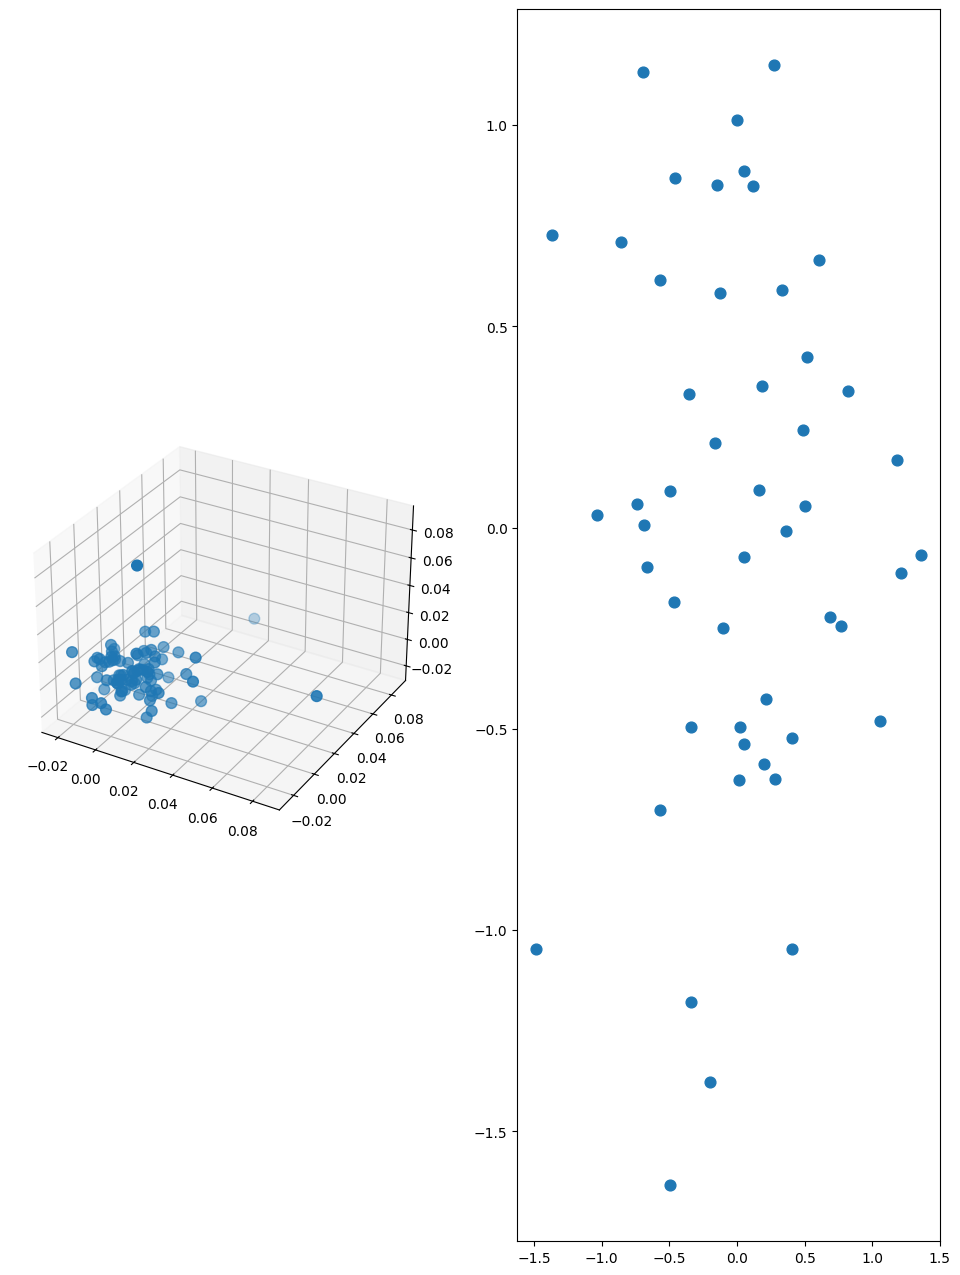

In [ ]:
import matplotlib.pyplot as plt

# Plot initialization
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(121, projection='3d') #1แถว2คอลัม ฟิกเกอร์1
ax1.scatter(A[:,0], A[:,1], A[:,2], s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(M2[:,0], M2[:,1], s=60);

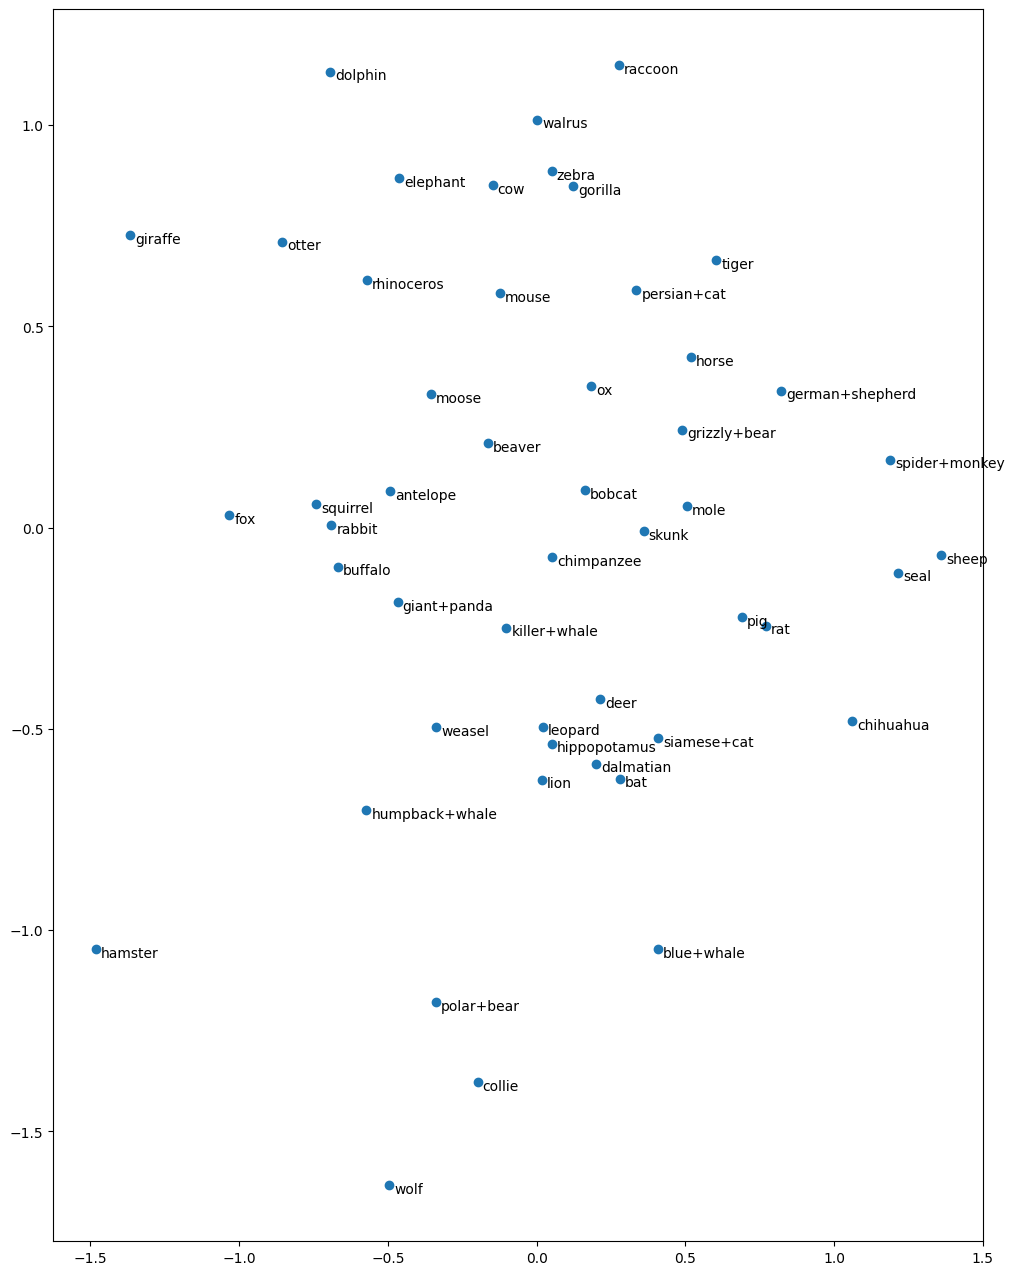

In [ ]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(M2[:,0], M2[:,1]); #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
     plt.annotate(classes[i,1],
                      xy=(M2[i,0], M2[i,1]),
                      xytext=(5, -8),
                      textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมขวาบน เช่น tiger, persian cat, horse, german shepherd, spider monkey, sheep เป็นสัตว์บกทั้งหมด
2. กลุ่มสัตว์ที่อยู่ในช่วง -0.5 เช่น weasel, leopard, deer, hippopotamus, dalmatian, bat, lion, siamese cat, deer, chihuahua เป็นสัตว์เลี้ยงลูกด้วยนมทั้งหมด
3. กลุ่มสัตว์บริเวณล่างสุดที่อยู่ในช่วงต่ำกว่า -1 เช่น hamster, polar bear, collie, blue whale, wolf เป็นสัตว์ที่สามารถอาศัยในพื้นที่อากาศหนาว
4. กลุ่มสัตว์ที่บริเวณกลางบน เช่น cow, zebra, gorilla, elephant, mouse, walrus เป็นสัตว์ที่อยู่รวมกันเป็นฝูง